## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Importing the Dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')

## Exploratory Data Analysis (EDA)

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.shape

(200, 5)

In [6]:
# We have such a low number of datapoints.
# How can we enlarge the present datapoints to train our model?

In [7]:
df.info()
# Gender is in the object format and we have to handle it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### Conclusions:
- Average age of customers is 38.
- Customers visiting the mail are between the ages of 18 and 70.
- Average annual income is $60k.

## Distribution

<Axes: xlabel='Age', ylabel='count'>

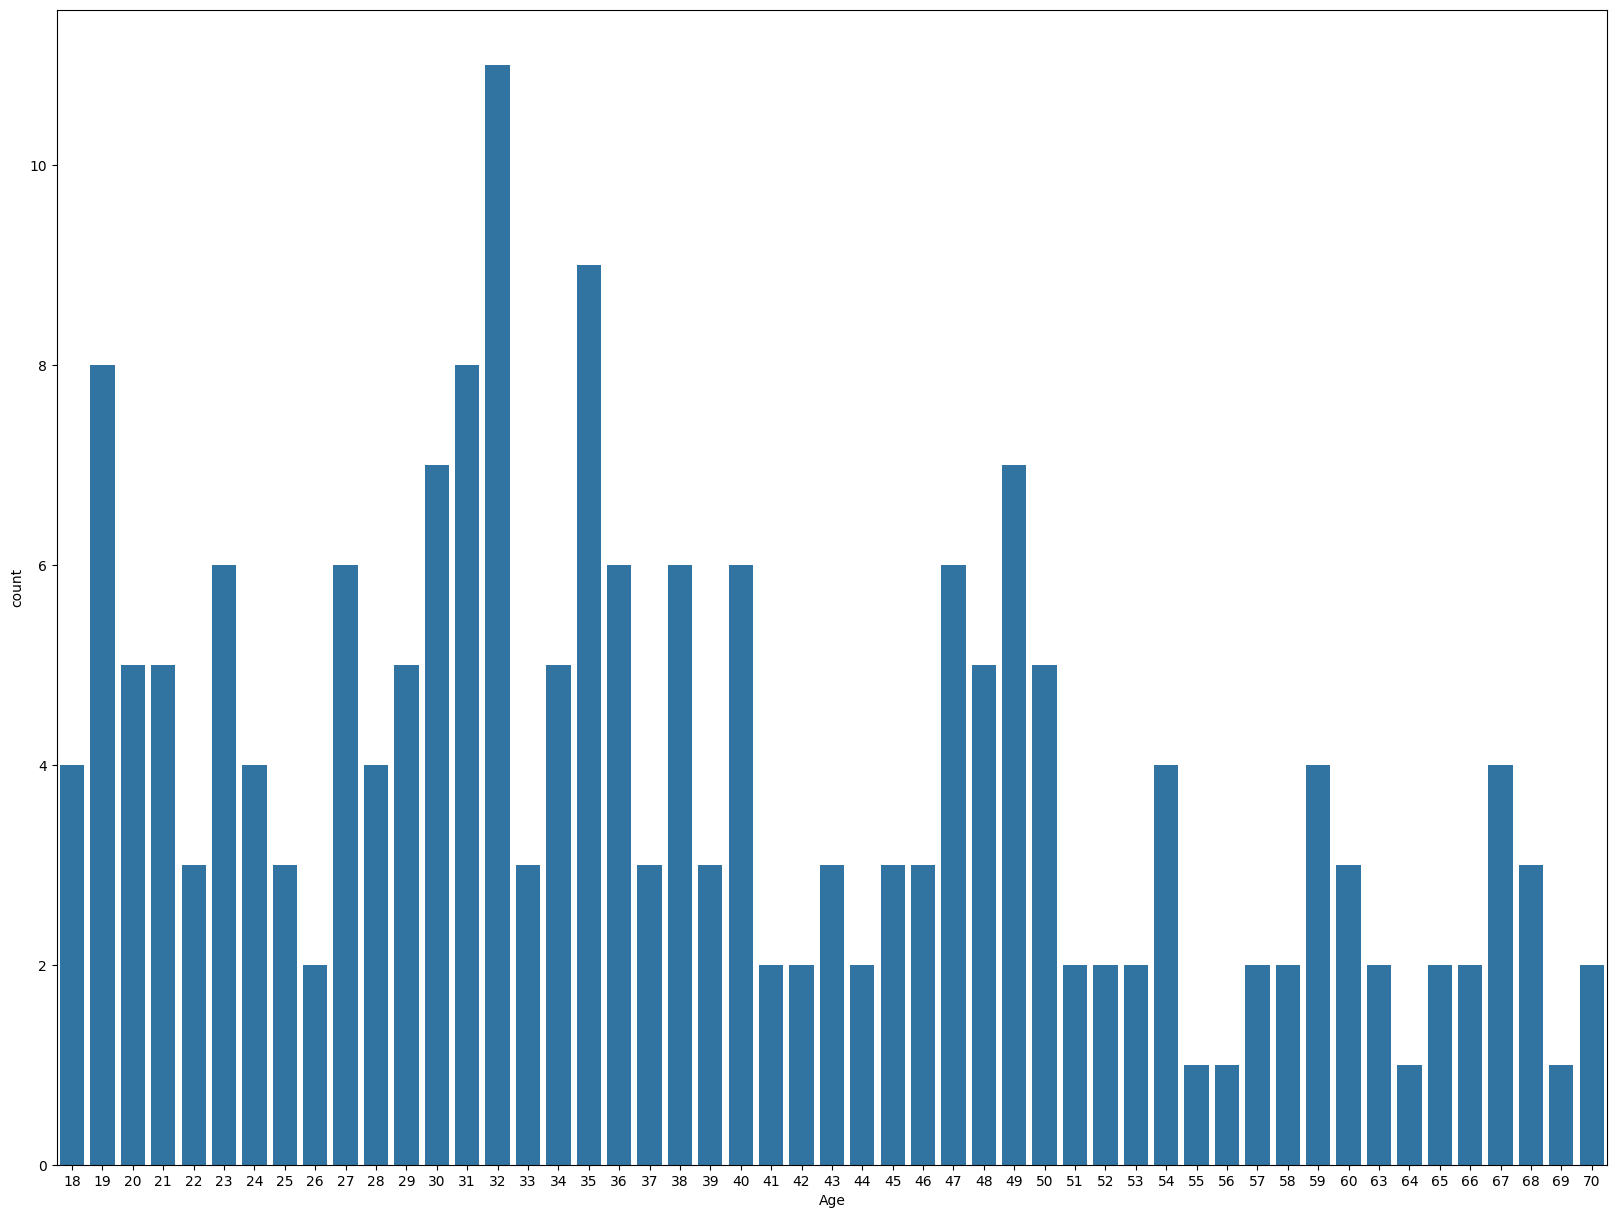

In [9]:
plt.figure(figsize=(20, 15))
sns.countplot(data=df, x='Age')

### Conclusion: 
- Customers from age 30 to 32 visit the mall more often

### Pie Chart: Percentage of Male and Female Visitors to the Mall
- The pie chart above shows the distribution of Male and Female visitors.
- The labels and percentages are automatically assigned based on the gender count.


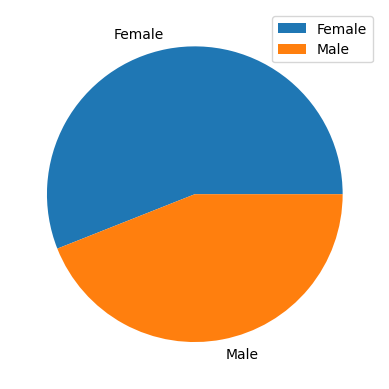

In [10]:
# THIS CELL IS THE WRONG ONE!!! This is included just to remember how not to write this

# Show how many % of Male and Female visits the mall with the help of a plot
# % -> Pie chart
plt.pie(df['Gender'].value_counts(), labels = ['Female', 'Male'])
plt.legend()
# It also comes in random according to the order of labels

# We cannot use like this
# plt.pie(df['Gender'].value_counts(), labels = ['Male', 'Female'])
# or
# plt.pie(df['Gender'].value_counts(), labels = ['Female', 'Male'])
# As they both just give the labels irrespective to the correct one

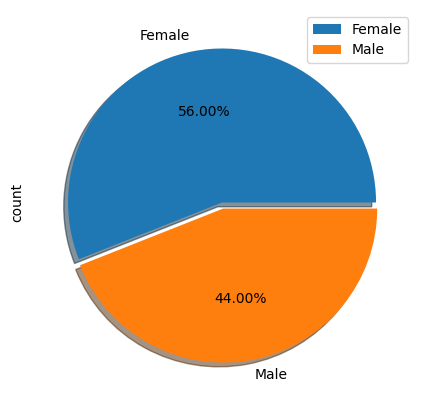

In [11]:
plt.figure(figsize=(5,5))
df.Gender.value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True, explode=(0, 0.04))
plt.legend()

### Conclusion:
 1. Number of female > Number of male
 2. Female 12% more than Male
 3. Female visits the mall most

### Distribution of Income

Text(0.5, 1.0, 'Distribution of Annual Income')

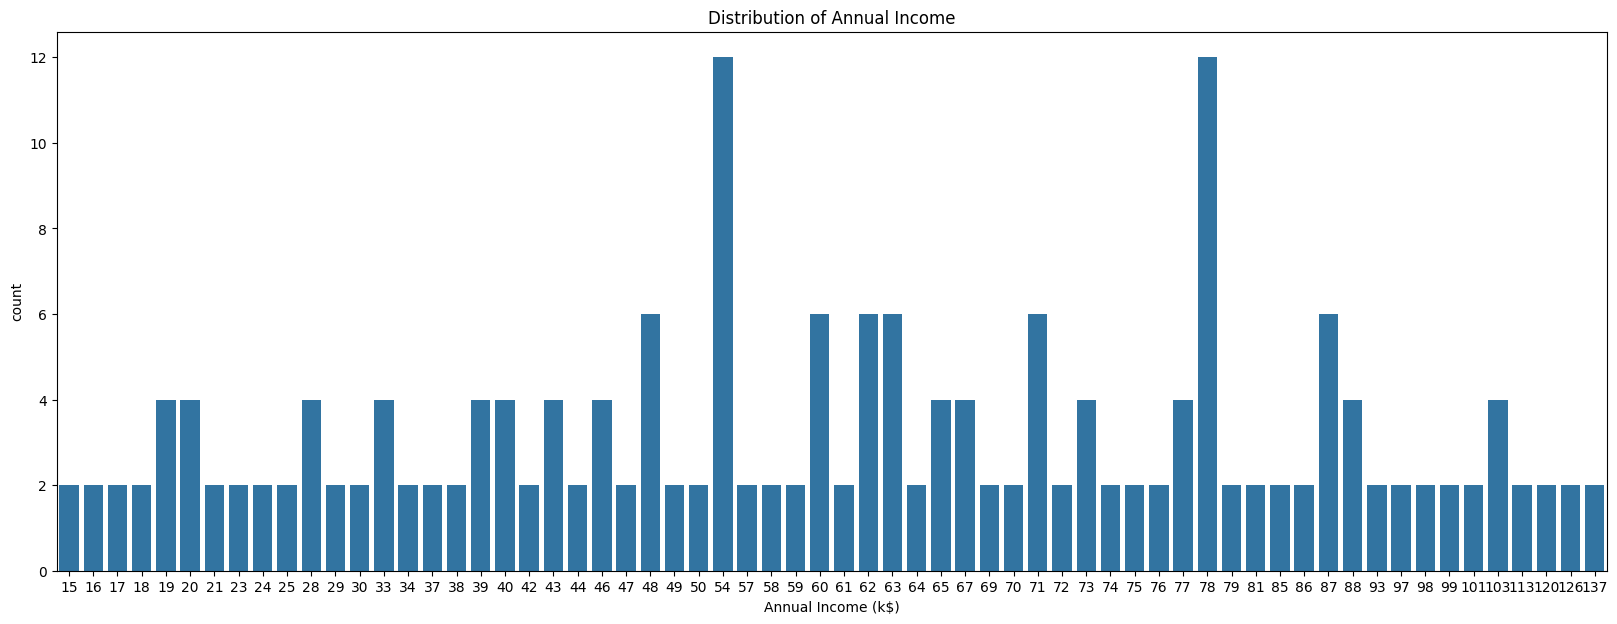

In [12]:
plt.figure(figsize=(20, 7))
# sns.countplot(df['Annual Income (k$)'], data=df)  
#  -> Error

sns.countplot(x='Annual Income (k$)', data=df)
plt.title('Distribution of Annual Income')

### Conclusion:
- Customers that are having the salary of 54k and 75k, visits the mall most of the time

#### Find the annual income distribution with respect to male and female.

In [13]:
# plt.figure(figsize=(7,7))
# sns.histplot(df, x='Annual Income (k$)', hue='Gender')

#### Here we have only 2 values and how come we have 3 colors here?
#### What does the gray color mean?

Text(0.5, 1.0, 'Annual Income Distribution with respect to Gender')

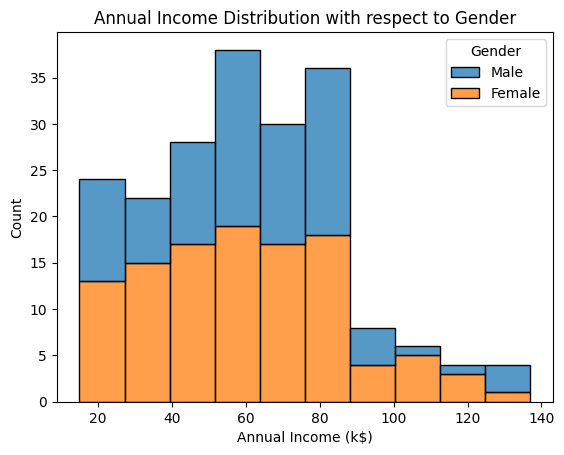

In [14]:
sns.histplot(df, x='Annual Income (k$)', hue='Gender', multiple='stack')
plt.title('Annual Income Distribution with respect to Gender')

##### Explanation of Gray Color in First Version:

In the first version of the code, the plot has three colors even though there are only two categories in the `Gender` column. The **gray color** typically appears when there is an additional category in the `Gender` column that wasn't expected. This could be due to:

1. **Unexpected Categories**: There might be extra or unrecognized values such as "Other", "Unknown", or even numerical values in the `Gender` column. These extra categories are visualized with the gray color.
   
2. **NaN or Missing Values**: If there are missing or `NaN` values in the `Gender` column, they can also be displayed with the gray color.

---

##### Why No Gray Color in the Second Version:

In the second version, the `sns.histplot` uses the `multiple='stack'` argument, which stacks the bars for each category (in this case, `Male` and `Female`). The **gray color** issue is resolved because the data likely doesn't contain any unexpected categories or missing values in this case.

However, if the gray color persists in your actual dataset, it could be an indication of missing values or other unexpected data points, which you can check by inspecting the unique values in the `Gender` column:


### Conclusions
- Even though the male earns most, female visits the mall more

## Seaborn lmplot
*seaborn.lmplot()* is a powerful function in Seaborn used to create scatterplots with linear regression lines. It’s particularly useful for visualizing relationships between two variables and their linear trends.
- We can use this for Linear Regression as well

In [15]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


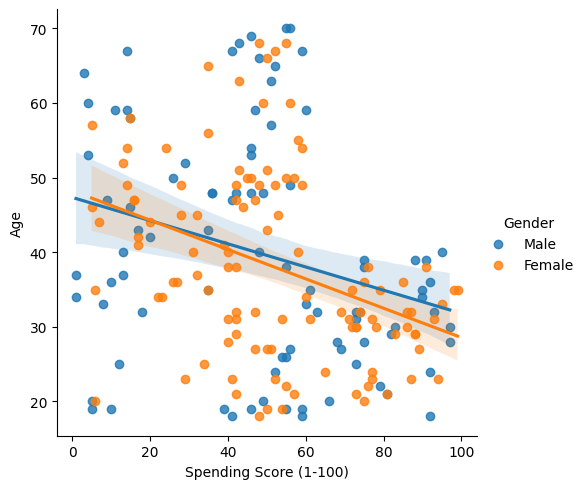

In [16]:
sns.lmplot(data=df, x='Spending Score (1-100)', y='Age', hue="Gender")

# Machine Learning

In [17]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


- Though CustomerID is numerical, it doesn't help us in segmentation.
- And the Gender is in object form, and hence we will use Label Encoding

## Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
enc=LabelEncoder()

In [20]:
df.Gender = enc.fit_transform(df.Gender)

In [21]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [22]:
# Dropping the CustomerID
df.drop('CustomerID', axis=1, inplace = True)

In [23]:
ssd = []
for i in range(1, 11):
    Kmodel = KMeans(n_clusters = i, n_init=15, max_iter=500)
    Kmodel.fit(df)
    ssd.append(Kmodel.inertia_)

In [24]:
ssd

[308862.06000000006,
 212889.44245524303,
 143391.59236035676,
 104414.67534220168,
 75427.71182424155,
 58348.641363315044,
 51132.703212576904,
 44391.82080487078,
 40987.31948051948,
 37868.46295572027]

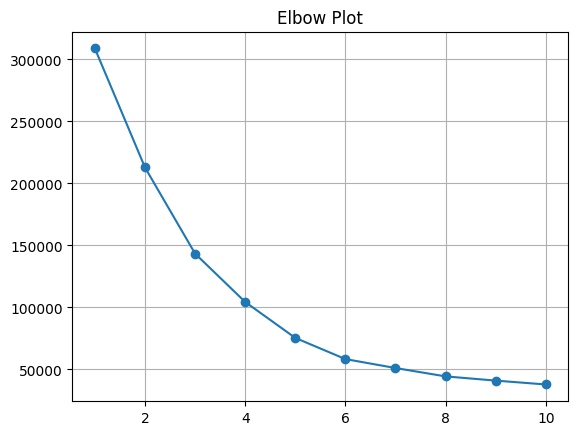

In [25]:
plt.plot(range(1, 11), ssd, marker='o')
plt.title('Elbow Plot')
plt.grid()

In [26]:
# k = 6
# As from the value 6, the decrease is very minimal and gradually becoming linear

In [27]:
Kmodel = KMeans(n_clusters = 6)

In [28]:
Kmodel.fit(df)

KMeans(n_clusters=6)

In [29]:
prediction = Kmodel.predict(df)

In [30]:
prediction

array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 3, 4, 3, 0,
       5, 4, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

Instead of using both .fit and .predict, we can do it in a single line using .fit_predict

In [31]:
len(prediction)

200

In [32]:
Kmodel.cluster_centers_

array([[ 0.34210526, 27.        , 56.65789474, 49.13157895],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.57142857, 41.68571429, 88.22857143, 17.28571429],
       [ 0.44444444, 56.15555556, 53.37777778, 49.08888889],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636],
       [ 0.38095238, 44.14285714, 25.14285714, 19.52380952]])

In [33]:
len(Kmodel.cluster_centers_)

6

In [34]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [35]:
df['Cluster'] = prediction

In [36]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,5
1,1,21,15,81,4
2,0,20,16,6,5
3,0,23,16,77,4
4,0,31,17,40,5


In [37]:
sns.color_palette(None, len(np.unique(prediction)))

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354)]

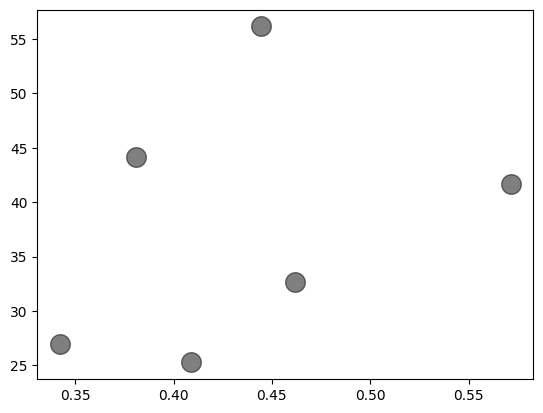

In [38]:
plt.scatter(Kmodel.cluster_centers_[:,0], Kmodel.cluster_centers_[:, 1], c='black', s=200, alpha=0.5)

In [39]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [40]:
var = linkage(df, method = 'ward')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [12.5, 12.5, 50.0, 50.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [82.5, 82.5, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [125.0, 125.0, 150.0, 150.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [137.5, 137.5, 183.75, 183.75],
  [96.25, 96.25, 160.625, 160.625],
  [31.25, 31.25, 128.4375, 128.4375],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [245.0, 245.0, 255.0, 255.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [250.0, 250.0, 272.5, 272.5],
  [222.5, 222.5, 261.25, 261.25],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [325.0, 325.0, 342

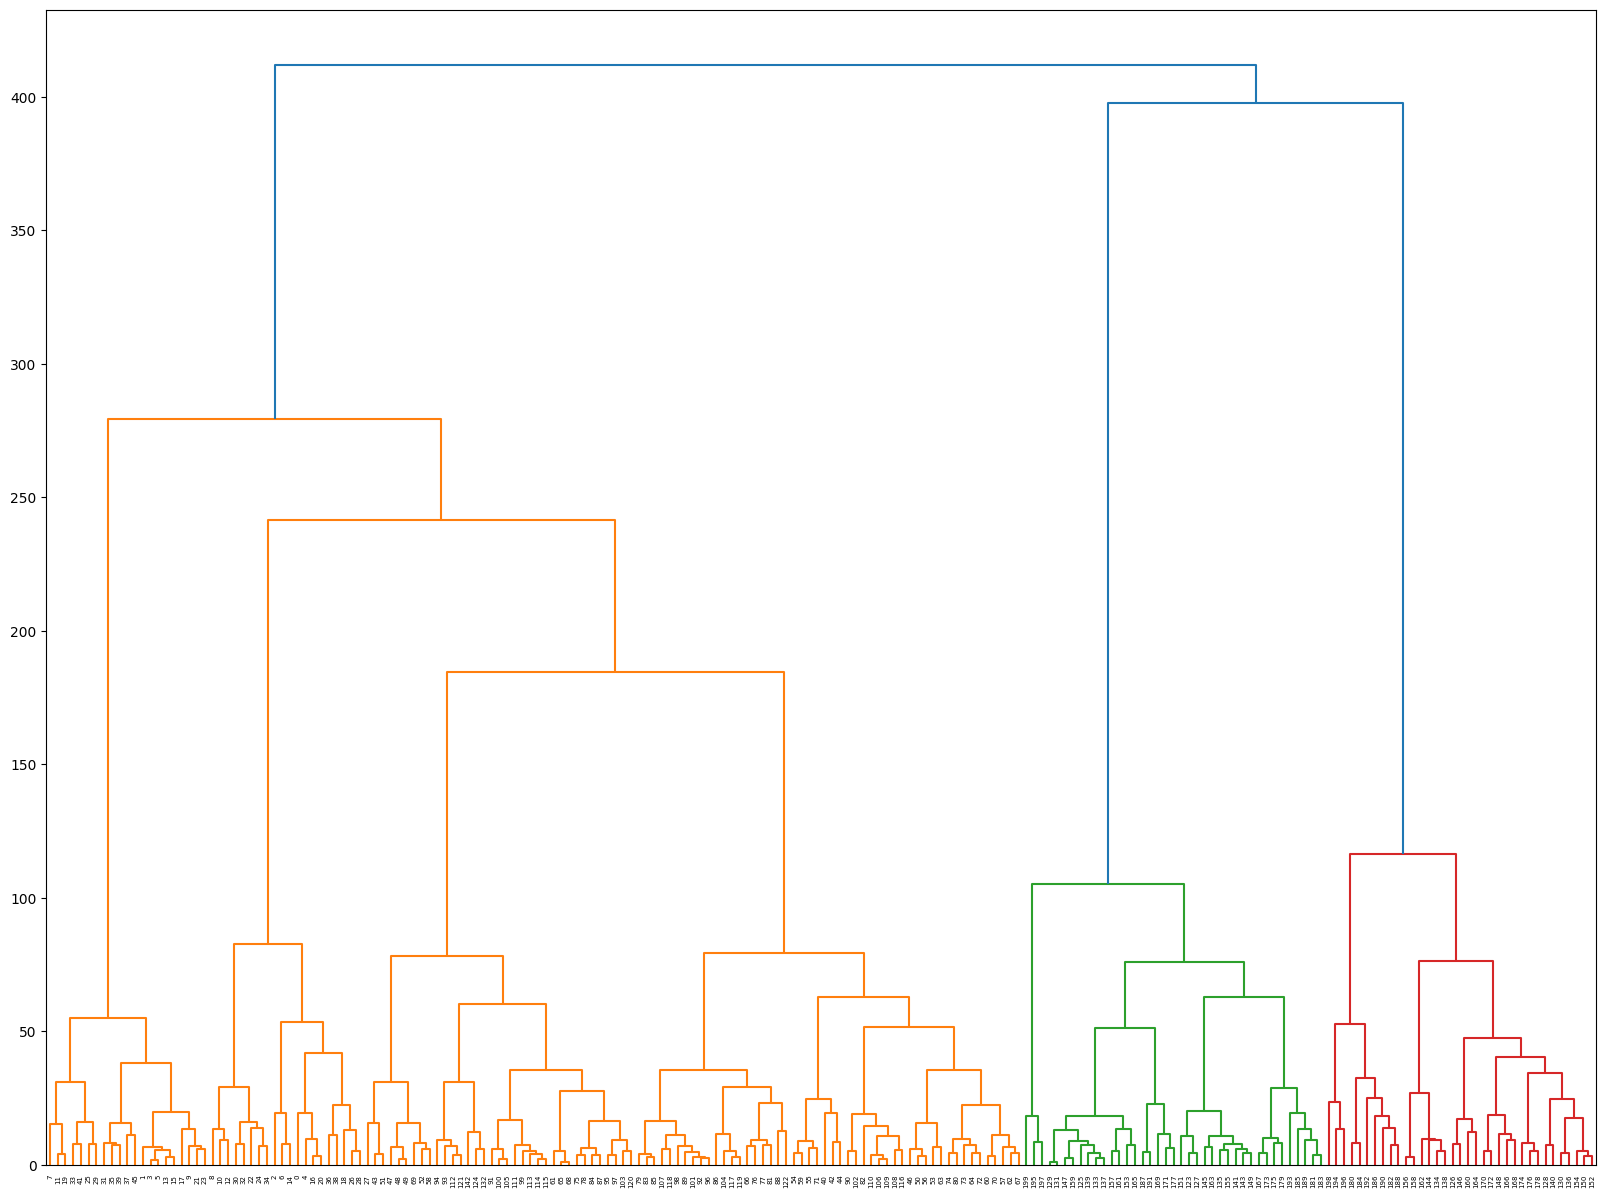

In [41]:
plt.figure(figsize=(20,15))
dendrogram(var, leaf_rotation=90)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000       

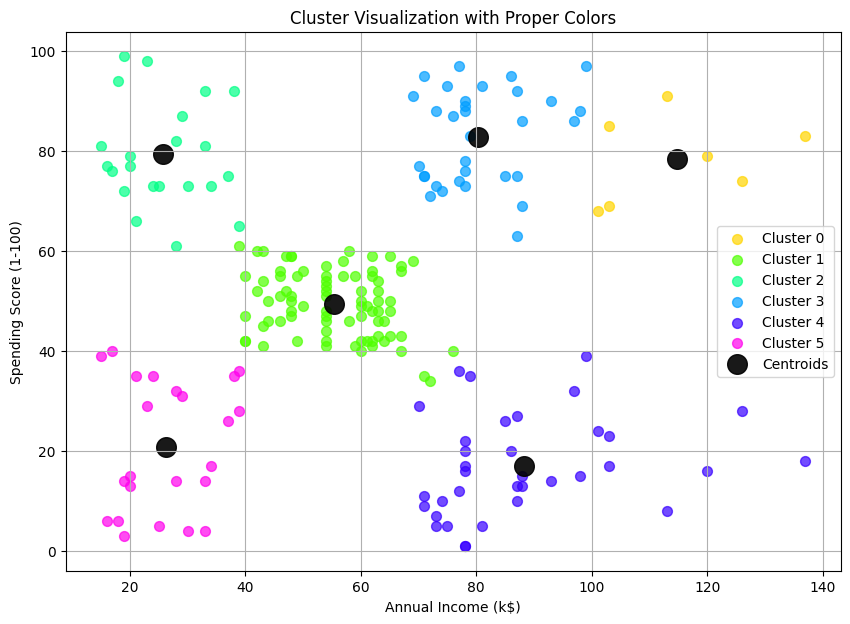

In [49]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Importing the Dataset
df = pd.read_csv('Mall_Customers.csv')

# Exploratory Data Analysis (EDA)
print(df.head())
print(df.describe())

# Selecting features for clustering
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Applying K-Means Clustering
Kmodel = KMeans(n_clusters=6)  # You can change the number of clusters as needed
prediction = Kmodel.fit_predict(features)

# Adding cluster predictions to the original DataFrame
df['Cluster'] = prediction

# Generate a unique color for each cluster
colors = sns.color_palette('hsv', len(np.unique(prediction)))

# Create the scatter plot for clusters
plt.figure(figsize=(10, 7))

# Iterate over unique cluster labels
for cluster_id in np.unique(prediction):
    # Filter points belonging to the current cluster
    cluster_points = df[prediction == cluster_id].values  # Use .values to access as NumPy array
    plt.scatter(cluster_points[:, 3], cluster_points[:, 4],  # Plot 'Annual Income' vs. 'Spending Score'
                label=f'Cluster {cluster_id}', 
                color=colors[cluster_id], 
                s=50, alpha=0.7)

# Plot centroids
plt.scatter(Kmodel.cluster_centers_[:, 0], Kmodel.cluster_centers_[:, 1], 
            c='black', s=200, alpha=0.9, label='Centroids')

# Add legend and labels
plt.title('Cluster Visualization with Proper Colors')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)  # Optional: Add grid for better readability
plt.show()

In [43]:
# DBSCAN